Copyright 2018 Artificial Intelligence Research Institute(AIRI), Korea

This file is part of lathe-and-shatter.
lathe-and-shatter is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

lathe-and-shatter is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with lathe-and-shatter.  If not, see <https://www.gnu.org/licenses/>.

In [1]:
%matplotlib inline

In [2]:
# coding: utf-8
from __future__ import print_function,division,absolute_import

In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt

**NOTE**

install ipywidgets for interactive plots. ipyvolume >= 4.0 required for plot_trisurf

```
run conda create -n lathe36 python=3.6.1
run conda install -y -n lathe36 jupyter
run conda install -y -n lathe36 -c conda-forge ipyvolume=0.4 ipywidgets=7.2 widgetsnbextension=3.2
run conda install -y -n lathe36 -c conda-forge tetgen
```

In [4]:
from matplotlib import cm
colors = cm.coolwarm(np.linspace(0.0,1.0,4))[:,:3]
colors = [[1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,1.0],[0.0,0.0,0.0]]

import ipyvolume.pylab as p3
# p3.figure()
# p3.plot_trisurf([0,0,3.,3.],[0,4.,0,4.],2.,triangles=[[0,2,3],[0,3,1]],color=colors)
# p3.squarelim()
# p3.show()

- https://docs.scipy.org/doc/scipy-0.15.1/reference/spatial.html 
- https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.spatial.Voronoi.html#qhull

### Object `Voronoi`

#### Attributes:

- **points** : ndarray of double, shape (npoints, ndim)
    - Coordinates of input _points_.
- **vertices** : ndarray of double, shape (nvertices, ndim)
    - Coordinates of the Voronoi _vertices_.
- **ridge_points** : ndarray of ints, shape (nridges, 2)
    - Indices of the _points_ between which each Voronoi _ridge_ lies.
- **ridge_vertices** : list of list of ints, shape (nridges, *)
    - Indices of the Voronoi _vertices_ forming each Voronoi _ridge_.
- **regions** : list of list of ints, shape (nregions, *)
    - Indices of the Voronoi _vertices_ forming each Voronoi _region_. -1 indicates vertex outside the Voronoi diagram.
- **point_region** : list of ints, shape (npoints)
    - Index of the Voronoi _region_ for each input _point_. If qhull option “Qc” was not specified, the list will contain -1 for points that are not associated with a Voronoi region.

#### Undocumented Attributes:

- **ridge_dict** : dictionary, **ridge_points** |=> **ridge_vertices**
- **ndim** : points ndim
- **npoints** : points num_points
- **min_bound** : min bound, `np.amin(points,axis=0)`
- **max_bound** : max bound, `np.amax(points,axis=0)`


In [5]:
from pattern import create_pattern, plot_pattern

/data2/AIRI/lathe-and-shatter/pattern.py:89: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/keeyoung/miniconda2/envs/lathe36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/keeyoung/miniconda2/envs/lathe36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/keeyoung/miniconda2/envs/lathe36/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/keeyoung/miniconda2/envs/lathe36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/keeyoung/miniconda2/envs/lathe36/lib/python3.6/site-packa

In [6]:
num_groups = 11
voronoi, lineseg_dict, c_point_linesegs = create_pattern(num_groups)

In [7]:
# from ipywidgets import interact,IntSlider

# @interact(point_number=IntSlider(min=0,max=num_groups-1,value=0,continuous_update=False))
# def show_voronoi_cell(point_number):
#     plt.figure(figsize=[11.5,4.5])
#     ax = plt.subplot(121)
#     plot_pattern(voronoi, lineseg_dict, c_point_linesegs, selections=[point_number],ax=ax)
#     ax = plt.subplot(122)
#     plot_pattern(voronoi, lineseg_dict, c_point_linesegs,ax=ax)


In [8]:
from simple_svg import normalize_svg

In [9]:
# use_map_xz = False
# svg_path = '''
# m 391.70976,851.54669 c 34.27007,-0.008 71.71313,-7.19875
# 101.93595,13.63887 22.69871,19.92007 58.04281,3.73196 49.27057,-27.83489
# -7.42351,-33.89336 -17.8381,-75.4953 -20.76928,-110.26026
# -8.10378,-67.27212 -11.74769,-115.35715 14.31191,-161.2026
# 26.0596,-45.84545 48.11138,-88.67184 59.80266,-124.06768
# 11.69128,-35.39584 20.08866,-65.99212 24.70468,-99.91615 0.34219,-36.23155
# -34.34188,-58.10628 -59.77117,-77.93939 -22.23515,-12.80355
# -25.84577,-39.51341 -36.09895,-59.87042 -34.55894,-10.05167
# -21.60299,42.42532 -2.74272,53.66117 23.91321,25.40224 58.26754,45.0354
# 65.532,82.13536 10.3486,46.08391 -14.84571,89.48711 -32.21182,130.63696
# -23.19916,50.76089 -54.16657,101.67171 -66.76628,153.50172
# -12.59971,51.83001 7.05534,94.55435 12.2199,141.5473 2.08716,19.53932
# 12.55321,30.24752 10.81054,57.76824 -1.74267,27.52072 -35.49165,10.32954
# -57.11444,7.47291 -21.62279,-2.85663 -42.9164,-1.12153 -64.02263,-1.03146
# '''
# simplified_svg_path = normalize_svg(svg_path)
# simplified_svg_path


In [10]:
# use_map_xz = False
# svg_path = '''
# m 32,872.3622 c 85.00366,0.46231 163.65989,-1.46892 217.51345,4.00054
# 53.85355,5.46946 72.88238,28.16978 74.36234,35.99567 15.6648,-1.77952
# 34.72603,-2.20097 56.73497,-0.16865 8.69378,-73.59952 3.53928,-153.31612
# 25.38924,-222.82756 21.84996,-69.51144 75.92261,-101.73139 98,-156
# 24.18459,-57.33333 24.27435,-115.93005 11,-172 -9.05665,-33.06504
# -25.67515,-61.33816 -52,-84 -26.32485,-22.66184 -41.87658,-32.57509
# -58,-40 -16.12342,-7.42491 -13.75092,-16.70175 0,-30 13.75092,-13.29825
# 49.60538,-32.45763 30,-46 -19.60538,-13.54237 -33.27204,-3.77275
# -57,10 -23.72796,13.77275 -63.62532,33.33373 -58,50 8.47183,34.14528
# 58.37288,47.54028 82,71 23.62712,23.45972 33.49236,43.40268 47,78
# 12.70482,54.66667 8.19076,106.99679 -14,164 -22.15739,49.96502
# -47.83344,101.58856 -75,148 -27.16656,46.41144 16.39025,159.58211
# -35.37051,170.56587 -47.32823,5.02241 -93.26638,-6.12352
# -138.62949,-5.56587 -45.36311,0.55765 -85.5124,-1.33296 -153.442715,7.2e-4
# '''
# simplified_svg_path = normalize_svg(svg_path)
# simplified_svg_path


In [11]:
# use_map_xz = True
# svg_path = '''
# m 72.9375,723.4247 c 34.16543,-0.28679 68.96657,-2.44188 102.5976,4.43271
# 13.76815,3.12321 14.41144,10.92511 16.30184,27.56522 7.24807,-0.24516
# 14.72789,-0.36454 21.83033,-0.27069 2.22108,-18.5269 6.77972,-23.2246
# 36.39811,-41.68574 31.99081,-19.3637 61.90677,-24.75747 92.32702,-38.87459
# 30.42025,-14.11712 47.28302,-20.99969 80.43205,-42.84689 33.14903,-21.8472
# 81.74098,-55.86091 105.73097,-79.43994 23.98999,-23.57903
# 23.41466,-47.65451 18.27888,-51.48078 -5.13578,-3.82627 -23.95785,11.30215
# -49.21251,36.7587 -25.25466,25.45655 -35.06842,31.98461 -62.76063,54.57486
# -27.69221,22.59025 -53.65612,38.66052 -101.85371,56.08804
# -48.19759,17.42752 -123.73552,39.16954 -170.67772,40.91027
# -46.9422,1.74073 -60.93221,2.68137 -90.32973,1.20633
# '''
# simplified_svg_path = normalize_svg(svg_path)
# simplified_svg_path


In [12]:
# 18-0702-09
use_map_xz = True
# svg_path = '''
# m 25.702381,166.97619 3.779761,-5.29167 8.315476,1.51191 8.315476,-0.75595
# 6.803572,-1.51191 6.047618,-2.26786 4.535715,6.04762 3.023809,8.31548 1.511906,4.53571
# h 8.315476 l 1.511903,-6.04762 0.755954,-6.04762 11.339285,-3.77976 9.071428,-3.77976
# 9.82738,-2.26786 11.33929,-3.02381 10.58333,-2.26785 10.58333,-3.02381 11.33929,-4.53572
# 6.04762,-7.55952 4.53571,-0.75595 6.04762,-6.80357 3.02381,-3.77977 3.77976,-3.77976
# 6.04762,-2.26786 3.77976,-3.0238 -2.26785,-6.04763 -7.55953,2.26786 -11.33928,4.53572
# -8.31548,4.53571 -3.02381,6.80357 -2.26786,5.29167 -3.77976,4.53571 -6.80357,1.51191
# -7.55952,0.75595 -9.07143,0.75595 -9.82738,0.75595 -8.31548,-0.75595 -13.60714,0.75595
# h -9.827382 l -12.095237,1e-5 -11.339285,-0.75596 -15.119048,-0.75595 H 32.505952 l -7.559523,0.75595
# '''
# svg_path = '''
# m 29.482142,161.68452 8.315476,1.51191 8.315476,-0.75595 6.803572,-1.51191 
# 6.047618,-2.26786 4.535715,6.04762 3.023809,8.31548 1.511906,4.53571 
# h 8.315476 l 1.511903,-6.04762 0.755954,-6.04762 11.339285,-3.77976 
# 9.071428,-3.77976 9.82738,-2.26786 11.33929,-3.02381 10.58333,-2.26785
# 10.58333,-3.02381 11.33929,-4.53572 6.04762,-7.55952 4.53571,-0.75595 
# 6.04762,-6.80357 3.02381,-3.77977 3.77976,-3.77976 6.04762,-2.26786 
# 3.77976,-3.0238 -2.26785,-6.04763 -7.55953,2.26786 -11.33928,4.53572 
# -8.31548,4.53571 -3.02381,6.80357 -2.26786,5.29167 -3.77976,4.53571 
# -6.80357,1.51191 -7.55952,0.75595 -9.07143,0.75595 -9.82738,0.75595 
# -8.31548,-0.75595 -13.60714,0.75595 h -9.827382 l -12.095237,1e-5 
# -11.339285,-0.75596 -15.119048,-0.75595 H 32.505952 l -7.559523,0.75595
# '''
svg_path = '''
m 139.09524,147.32143 40.82142,2.26785 h 39.30953 l 47.62499,-7.55952 39.30954,-9.82738 24.94643,-6.80357 18.14285,-0.75596 9.82739,12.09524 12.85118,20.41072 11.33927,27.97023 9.07143,27.97024 5.29167,17.38691 9.07145,6.80357 12.85118,2.26786 18.89882,-1.51191 9.82736,-7.55952 9.07143,-20.41072 4.53572,-19.65476 5.29167,-20.41071 12.09524,-13.60715 24.19046,-7.55952 36.28572,-11.33928 40.06549,-12.09524 37.7976,-12.85119 38.55358,-10.58334 37.79761,-11.33928 42.33333,-10.583333 39.30954,-8.315478 40.82142,-9.071428 38.55358,-9.827381 26.45833,-12.095237 24.94643,-15.875001 18.89881,-18.8988088 15.11904,-19.6547612 13.60715,-11.339286 21.9226,-18.898808 22.67858,-24.190476 15.87502,-17.386906 16.6309,-16.630946 27.2143,-15.11905 27.9703,-7.55953 14.3631,-10.58333 1.5119,-14.36309 -9.0715,-12.09524 -10.5833,-5.29167 -22.6786,3.02381 -26.4583,6.80357 -27.2143,9.07143 -24.19046,12.09524 -27.97024,17.3869 -27.2143,19.654764 -15.11904,28.726191 -13.60715,30.238093 -8.31548,15.875 -8.31546,12.095238 -10.58333,8.3154765 -13.60715,3.77976179 -28.72618,5.29166651 -31.75,2.2678573 -37.79764,4.5357139 -46.11309,6.047619 -26.45833,0.755953 -39.30952,2.267857 -43.0893,3.779761 -45.35712,3.779762 -47.625,3.023809 -44.60121,3.023809 -50.64879,3.779764 -49.13691,3.023809 -49.89285,3.023809 -47.62499,3.779763 -46.86906,3.023809 -46.86905,3.779761 -39.30952,3.023809
'''
simplified_svg_path = normalize_svg(svg_path)
simplified_svg_path

'm139,147m40,2h39l47,-7l39,-9l24,-6l18,0l9,12l12,20l11,27l9,27l5,17l9,6l12,2l18,-1l9,-7l9,-20l4,-19l5,-20l12,-13l24,-7l36,-11l40,-12l37,-12l38,-10l37,-11l42,-10l39,-8l40,-9l38,-9l26,-12l24,-15l18,-18l15,-19l13,-11l21,-18l22,-24l15,-17l16,-16l27,-15l27,-7l14,-10l1,-14l-9,-12l-10,-5l-22,3l-26,6l-27,9l-24,12l-27,17l-27,19l-15,28l-13,30l-8,15l-8,12l-10,8l-13,3l-28,5l-31,2l-37,4l-46,6l-26,0l-39,2l-43,3l-45,3l-47,3l-44,3l-50,3l-49,3l-49,3l-47,3l-46,3l-46,3l-39,3'

In [13]:
from scipy.spatial import Voronoi, voronoi_plot_2d

In [14]:
user_seed = 2#802087
num_groups = 9

In [15]:
np.random.seed(user_seed)
cells = np.random.uniform([0.0,0.0],[1.0,1.0],size=[num_groups,2])

if use_map_xz:
    voronoi = Voronoi(cells)
    voronoi_points = voronoi.points[:]
    voronoi_group = np.arange(len(voronoi_points))
else:
    cells_mirrored = np.concatenate([cells,cells + [-1.0, 0.0],cells + [1.0, 0.0],],axis=0)
    voronoi = Voronoi(cells_mirrored)
    voronoi_points = voronoi.points[:]
    voronoi_group = np.arange(len(voronoi_points))
    voronoi_group[num_groups:num_groups*2] -= num_groups
    voronoi_group[num_groups*2:] -= num_groups * 2

In [16]:
!mkdir -p outputs

/home/keeyoung/miniconda2/envs/lathe36/lib/python3.6/site-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


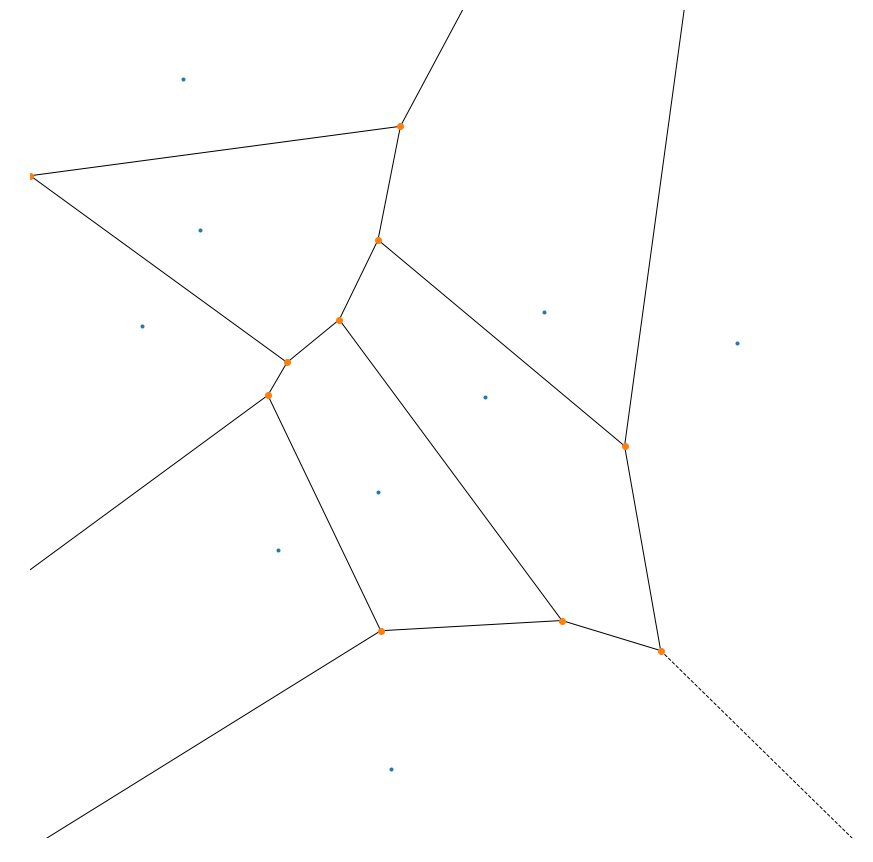

In [17]:
from pattern import save_pattern_png, save_pattern_json
save_pattern_json(voronoi, 'outputs/voronoi_shatter.json')
save_pattern_png(voronoi, 'outputs/voronoi.png')

In [18]:
filename = 'outputs/voronoi_shatter.json'

In [19]:
import json

voronoi_shatter = { 
    'num_groups': num_groups,
    'point_group': voronoi_group.tolist(),
    'point': voronoi.points.tolist(),
}   
with open(filename,'w') as f:
    json.dump(voronoi_shatter,f)

matplotlib Path Tutorial
- https://matplotlib.org/1.3.1/users/path_tutorial.html
    
SVG Path Tutorial (MDN)
- https://developer.mozilla.org/ko/docs/Web/SVG/Tutorial/Paths

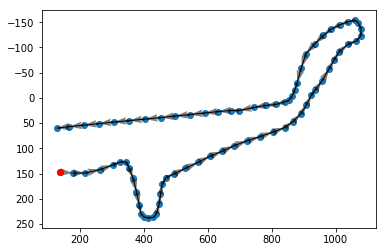

In [20]:
from simple_svg import svg_to_paths
path_verts, path_codes = svg_to_paths(simplified_svg_path,debug_curves=False)

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.path as mpath
Path = mpath.Path

fig, ax = plt.subplots() # (figsize=[3.5,7.5])

vert_xs, vert_ys = zip(*path_verts)
ax.scatter(vert_xs,vert_ys)

pp1 = mpatches.PathPatch(Path(path_verts,path_codes),fc="none", transform=ax.transData)
ax.add_patch(pp1)

# ax.plot(vert_xs,vert_ys,"ko")
for i, _ in enumerate(vert_xs[:-1]):
    x, y = vert_xs[i], vert_ys[i]
    nx, ny = vert_xs[i+1], vert_ys[i+1]
    ax.quiver([x],[y],[nx-x],[ny-y],scale_units='xy',angles='xy',scale=1,color='k',alpha=0.5)

ax.plot([path_verts[0][0]],[path_verts[0][1]],"ro")

ax.invert_yaxis()

plt.show()
#print(path_codes)

In [21]:
from parse_svg_path import parse_svg_path
#curve_points = parse_svg_path(simplified_svg_path)
curve_points = parse_svg_path(simplified_svg_path, rand_perturbation=0.00, rand_seed=110)
print(np.array(curve_points).shape, curve_points)

(74, 2) [[139.0, 147.0], [179.0, 149.0], [218.0, 149.0], [265.0, 142.0], [304.0, 133.0], [328.0, 127.0], [346.0, 127.0], [355.0, 139.0], [367.0, 159.0], [378.0, 186.0], [387.0, 213.0], [392.0, 230.0], [401.0, 236.0], [413.0, 238.0], [431.0, 237.0], [440.0, 230.0], [449.0, 210.0], [453.0, 191.0], [458.0, 171.0], [470.0, 158.0], [494.0, 151.0], [530.0, 140.0], [570.0, 128.0], [607.0, 116.0], [645.0, 106.0], [682.0, 95.0], [724.0, 85.0], [763.0, 77.0], [803.0, 68.0], [841.0, 59.0], [867.0, 47.0], [891.0, 32.0], [909.0, 14.0], [924.0, -5.0], [937.0, -16.0], [958.0, -34.0], [980.0, -58.0], [995.0, -75.0], [1011.0, -91.0], [1038.0, -106.0], [1065.0, -113.0], [1079.0, -123.0], [1080.0, -137.0], [1071.0, -149.0], [1061.0, -154.0], [1039.0, -151.0], [1013.0, -145.0], [986.0, -136.0], [962.0, -124.0], [935.0, -107.0], [908.0, -88.0], [893.0, -60.0], [880.0, -30.0], [872.0, -15.0], [864.0, -3.0], [854.0, 5.0], [841.0, 8.0], [813.0, 13.0], [782.0, 15.0], [745.0, 19.0], [699.0, 25.0], [673.0, 25.0]

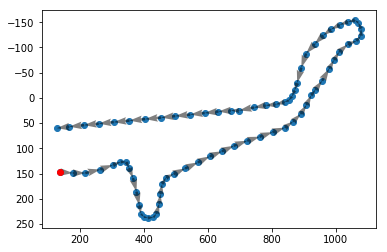

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots() # (figsize=[3.5,7.5])

vert_xs, vert_ys = zip(*curve_points)

ax.scatter(vert_xs,vert_ys)
ax.plot([vert_xs[0]],[vert_ys[0]],"ro")

# ax.plot(vert_xs,vert_ys,"ko")
for i, _ in enumerate(vert_xs[:-1]):
    x, y = vert_xs[i], vert_ys[i]
    nx, ny = vert_xs[i+1], vert_ys[i+1]
    ax.quiver([x],[y],[nx-x],[ny-y],scale_units='xy',angles='xy',scale=1,color='k',alpha=0.5)

ax.invert_yaxis()

plt.show()

In [23]:
from bezier_to_lineseg import bezier_to_lineseg
from lathe_path import lathe_path

points = bezier_to_lineseg(curve_points, tolerance=0.016, simplify_eps=0.001)
position, texcoord, indices = lathe_path(points, 
                                         num_divisions=360, 
                                         cap_start=False,
                                         cap_end=False,
                                         use_map_xz=use_map_xz)
# position = coord of each points in x,y,z space
# texcoord = coord of each points in u,v space
# indices = indices of 3 points for triangles mesh

In [24]:
position.shape, texcoord.shape, indices.shape

((148320, 3), (148320, 2), (296640, 3))

In [25]:
x, y, z = position.transpose()
if use_map_xz:
    u, v = x, z
else:
    u, v = texcoord.transpose()

triangles = indices[:]
xs, ys, zs = position[triangles].transpose()

import ipyvolume.pylab as p3
import numpy as np

# p3.figure()
# p3.plot_trisurf(x, -y, z, triangles=triangles, u=u, v=v)
# p3.squarelim()
# p3.show()

In [26]:
from PIL import Image
t_voronoi = Image.open('outputs/voronoi.png') # texture from voronoi map
texture = t_voronoi

import ipyvolume.pylab as p3
import numpy as np

p3.figure()
p3.plot_trisurf(x, -y, z, triangles=triangles, u=u, v=v, texture=texture)
p3.squarelim()
p3.show()

In [27]:
# from pattern import load_pattern_json
# num_groups, voronoi_points, voronoi_group = load_pattern_json('outputs/voronoi_shatter.json')

In [28]:
from matplotlib import cm
colors = cm.coolwarm(np.linspace(0.0,1.0,num_groups))[:,:3]

In [29]:
from pattern import find_voronoi_group
vert_group = find_voronoi_group(texcoord,voronoi_points,voronoi_group)
vert_color = colors[vert_group]

In [30]:
import ipyvolume.pylab as p3
import numpy as np

# p3.figure()
# p3.plot_trisurf(x, -y, z, triangles=triangles, color=vert_color)
# p3.squarelim()
# p3.show()

# generate .smesh file

tetgen document: http://wias-berlin.de/software/tetgen/1.5/doc/manual/manual.pdf

.node file format: http://wias-berlin.de/software/tetgen/1.5/doc/manual/manual006.html


In [31]:
vert_group = -(2 + find_voronoi_group(texcoord,voronoi_points,voronoi_group))
face_group = -(2 + find_voronoi_group(np.min(texcoord[triangles],axis=1),voronoi_points,voronoi_group))

In [32]:
from lathe_path import save_mesh

with open('outputs/generated_lathe.smesh','w') as f:
    save_mesh(f,position,indices,
              node_attrs=texcoord,
              node_boundary_markers=vert_group,
              face_boundary_markers=face_group)